## **Análise de Atribuição e Performance de Funcionários da IBM**

Este projeto de Data Science tem como objetivo analisar os dados de funcionários da IBM para entender os fatores que contribuem para a rotatividade (attrition) e avaliar o desempenho dos colaboradores. Utilizando técnicas de análise de dados e aprendizado de máquina, buscamos identificar padrões e insights que possam auxiliar na tomada de decisões estratégicas de Recursos Humanos.

**Source:** https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

**Objetivos do Projeto:**

1. **Analisar a Rotatividade:** Identificar as principais causas que levam os funcionários a deixarem a empresa.
2. **Avaliar o Desempenho:** Determinar os fatores que influenciam o desempenho dos funcionários.
3. **Previsão de Atribuição:** Desenvolver modelos preditivos para antecipar quais funcionários têm maior probabilidade de sair.
4. **Recomendações Estratégicas:** Oferecer recomendações baseadas em dados para reduzir a rotatividade e melhorar a performance geral.

**Metodologia**

1. **Entendimento e Tratamento dos Dados**
2. **Exploração de Dados (EDA)**
3. **Pré-processamento de Dados**
4. **Feature Engineering**
5. **Modelagem Preditiva**
6. **Avaliação de Desempenho**

### **1. Entendimento e Tratamento dos Dados**

#### **1.1 Bibliotecas**

In [1]:
# Importando libs
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.set_option('display.max_columns', None)

# Desativando mensagens de alertas
import warnings as wns
wns.filterwarnings('ignore')

#### **1.2 Carregamento de Dados**

In [21]:
# Carregando dados a partir do arquivo csv
df = pd.read_csv("data/IBM_Employee_Attrition.csv")

# Visualizando duas linhas do dataframe
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


#### **1.3 Análise Inicial**

In [22]:
analytics = pd.DataFrame()
analytics['columns'] = df.columns
analytics['count'] = [df[col].count() for col in df.columns]
analytics['NaN'] = [df[col].isnull().sum() for col in df.columns]
analytics['dtypes'] = [df[col].dtype for col in df.columns]
analytics['uniques'] = [df[col].unique() for col in df.columns]

In [23]:
analytics

,columns,count,NaN,dtypes,uniques
0,Age,1470,0,int64,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,1470,0,object,"[Yes, No]"
2,BusinessTravel,1470,0,object,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,1470,0,int64,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,1470,0,object,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,1470,0,int64,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,1470,0,int64,"[2, 1, 4, 3, 5]"
7,EducationField,1470,0,object,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,1470,0,int64,[1]
9,EmployeeNumber,1470,0,int64,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


In [24]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,37.0,9.0,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.0,404.0,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.0,8.0,1.0,2.0,7.0,14.0,29.0
Education,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,1025.0,602.0,1.0,491.0,1020.0,1556.0,2068.0
EnvironmentSatisfaction,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0
HourlyRate,1470.0,66.0,20.0,30.0,48.0,66.0,84.0,100.0
JobInvolvement,1470.0,3.0,1.0,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0


#### **1.4 Limpeza dos Dados**

In [25]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [26]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [27]:
df['Attrition'].replace({"Yes": 1, "No": 0}, inplace=True)
df['OverTime'].replace({"Yes": 1, "No": 0}, inplace=True)

In [28]:
df.to_csv("data/IBM_Employee_Attrition_clean.csv", index=False)

### **2. Exploração de Dados**

#### **Functions**

In [10]:
def add_percent_and_total_value_annotations(ax: matplotlib.axes.Axes, 
                                            total: int | float) -> None:
    for p in ax.patches:
        if (100 * p.get_height() / total) < 1:
            continue
        percentage = f'{100 * p.get_height() / total:.2f}% ({p.get_height():.0f})'
        x = p.get_x() + p.get_width()/1.9
        y = p.get_height()/1.1
        ax.annotate(percentage, (x, y), 
                    ha='center', 
                    va='top', 
                    fontweight='normal')


def create_histogram_to_performance_view(data, x, palette, title, xlabel, num=5, annotations=True, binned=True):
    total = data[x].count()

    quantiles = np.linspace(0,100, num)/100
    bins = data[x].quantile(quantiles).to_list()
    labels = [f"{bins[i]:,.0f} - {bins[i+1]:,.0f}" for i in range(len(bins)-1)]
    data['Binned'] = pd.cut(data[x], bins=bins, include_lowest=True, labels=labels)

    ax = sns.histplot(data=data, x='Binned', hue='PerformanceRating', palette=palette)
    plt.legend(labels=["Fora do Comum", "Excelente"], frameon=False, title='Performance')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.yticks([])
    plt.ylabel("")
    plt.xlabel(xlabel)
    plt.title(title)
    ax.spines[['left', 'top', 'right']].set_visible(False)

    if annotations:
        add_percent_and_total_value_annotations(ax, total)
    
    plt.show()


def create_histogram_to_attrition_view(data, x, palette, title, xlabel, num=5, annotations=True, binned=True):
    total = data[x].count()

    quantiles = np.linspace(0,100, num)/100
    bins = data[x].quantile(quantiles).to_list()
    labels = [f"{bins[i]:,.0f} - {bins[i+1]:,.0f}" for i in range(len(bins)-1)]
    data['Binned'] = pd.cut(data[x], bins=bins, include_lowest=True, labels=labels)

    ax = sns.histplot(data=data, x='Binned', hue='Attrition', palette=palette)
    plt.legend(labels=["Sim", "Não"], frameon=False, title='Rotatividade')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.yticks([])
    plt.ylabel("")
    plt.xlabel(xlabel)
    plt.title(title)
    ax.spines[['left', 'top', 'right']].set_visible(False)

    if annotations:
        add_percent_and_total_value_annotations(ax, total)
    
    plt.show()

#### **2.1 Rotatividade**

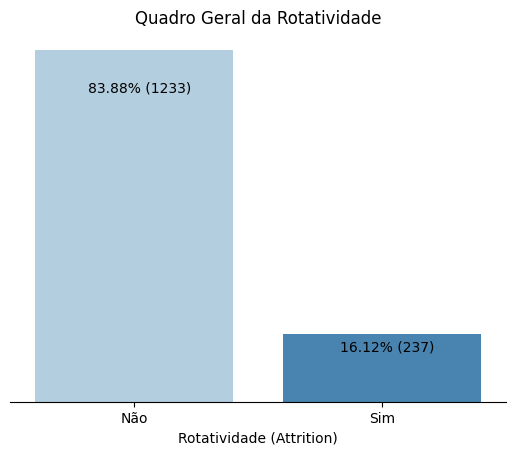

In [11]:
total = df.Attrition.count()

ax = sns.countplot(data=df, x="Attrition", palette="Blues")

plt.yticks([])
plt.ylabel("")
plt.xticks(ticks=[0, 1], labels=["Não", "Sim"])

add_percent_and_total_value_annotations(ax, total)
plt.title("Quadro Geral da Rotatividade")
ax.spines[['left', 'top', 'right']].set_visible(False)
plt.xlabel(xlabel="Rotatividade (Attrition)")
plt.show()

##### **2.1.1 Idade vs Rotatividade**

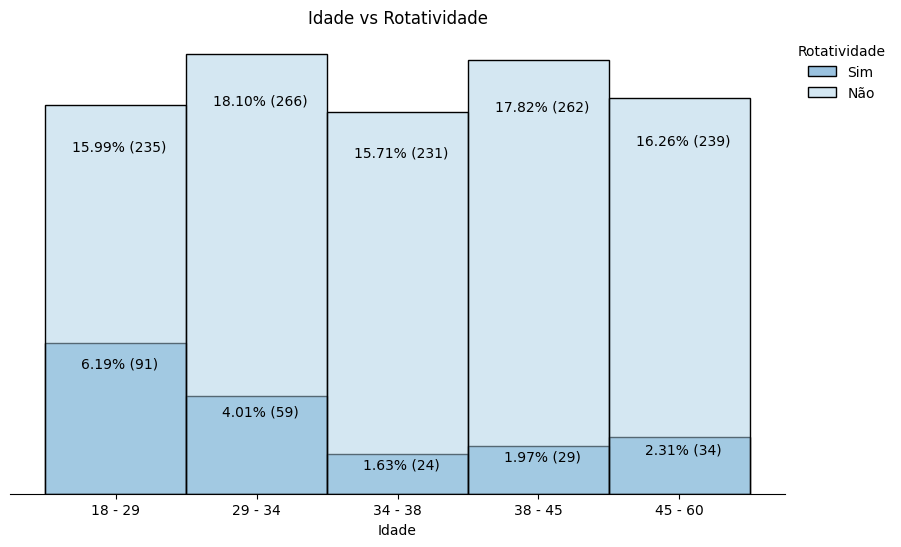

In [12]:
# Idade vs Rotatividade
fig = plt.figure(figsize=(10,6))

create_histogram_to_attrition_view(data=df, 
                            x="Age", 
                            palette="Blues",
                            title="Idade vs Rotatividade",
                            xlabel="Idade",
                            num=6)

**• Observa-se que a faixa etária de 18 a 34 anos apresenta 10.2% da rotatividade da empresa.** <br>
**• Além disso, percebe-se uma tendência de estabilização, percentual, da rotatividade ao longo dos anos, com uma diminuição no número de funcionários deixando a empresa.**

OBS: Caso alguma porcentagem não aparece é por ser inferior a 1%

##### **2.1.2 Renda Mensal vs Rotatividade**

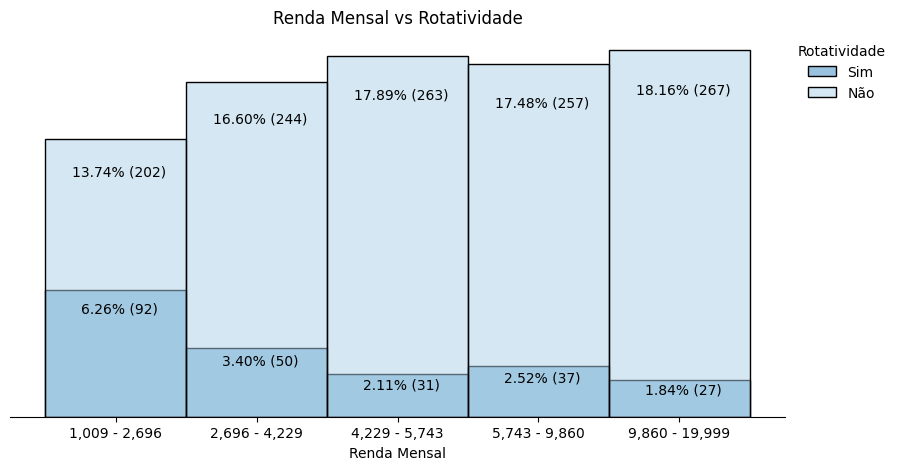

In [13]:
# Renda Mensal vs Rotatividade
fig = plt.figure(figsize=(10,5))

create_histogram_to_attrition_view(data=df, 
                            x="MonthlyIncome", 
                            palette="Blues",
                            title="Renda Mensal vs Rotatividade",
                            xlabel="Renda Mensal",
                            num=6)

In [14]:
df.groupby('JobRole')["MonthlyIncome"].mean().sort_values()[:4], \
    df.groupby('JobRole')["Attrition"].mean().sort_values(ascending=False)[:4]

(JobRole
 Sales Representative     2626.000000
 Laboratory Technician    3237.169884
 Research Scientist       3239.972603
 Human Resources          4235.750000
 Name: MonthlyIncome, dtype: float64,
 JobRole
 Sales Representative     0.397590
 Laboratory Technician    0.239382
 Human Resources          0.230769
 Sales Executive          0.174847
 Name: Attrition, dtype: float64)

**• Sales Representative, Laboratory Technician, Research Scientist, Human , são os cargos mais afetados pelo baixo salário, sendo Sales Representative com ~40% de Rotatividade**

##### **2.1.3 Distância de Casa vs Rotatividade**

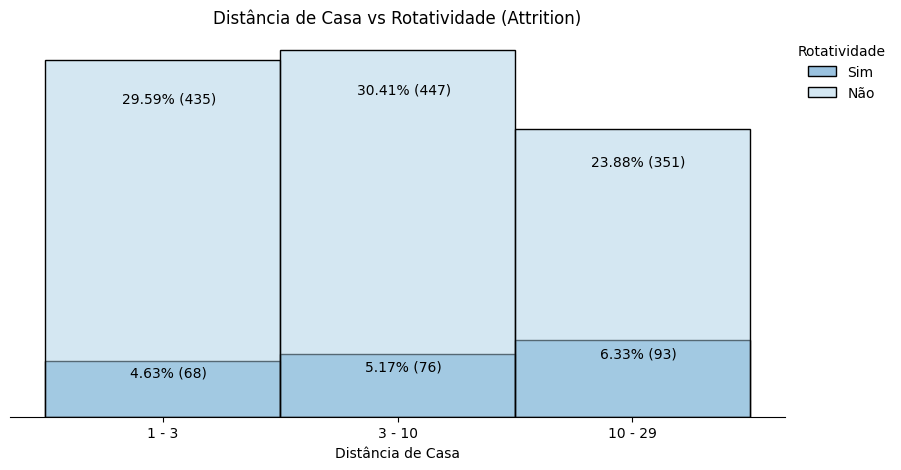

In [15]:
# Distância de Casa vs Rotatividade
fig = plt.figure(figsize=(10,5))

create_histogram_to_attrition_view(data=df, 
                            x="DistanceFromHome", 
                            palette="Blues",
                            title="Distância de Casa vs Rotatividade (Attrition)",
                            xlabel="Distância de Casa",
                            num=4)

In [16]:
more_than_10 = df[df['DistanceFromHome'] >= 10]
f"{more_than_10['Attrition'].sum() / more_than_10['Attrition'].count()*100:.2f} % dos colaboradores"

'19.62 % dos colaboradores'

• Dos colaboradores que moram a mais de 10 km, a distância torna-se um fator para permanência no cargo, com ~20% de saídas da empresa. <br>
• Portanto, é evidente que, a distância de casa influência na decisão do colaborador permanecer na empresa.

##### **2.1.4 Anos na Empresa vs Rotatividade**

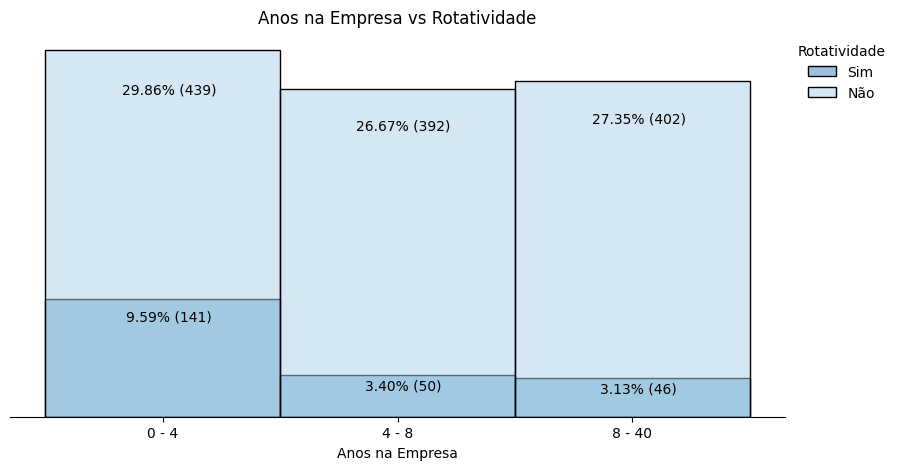

In [17]:
# Anos na Empresa vs Rotatividade
fig = plt.figure(figsize=(10,5))

create_histogram_to_attrition_view(
    data=df,
    x='YearsAtCompany',
    palette='Blues',
    title="Anos na Empresa vs Rotatividade",
    xlabel="Anos na Empresa",
    num=4
)

In [18]:
less_than_4_years = df[df['YearsAtCompany'] <= 4]
less_than_4_years['Education'].value_counts().sort_values(ascending=False)[:3], \
    less_than_4_years.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False)[:3], \
        f"Média de Renda: ${less_than_4_years['MonthlyIncome'].mean():,.2f}"

(Education
 3    229
 4    138
 2    112
 Name: count, dtype: int64,
 JobRole
 Sales Representative     0.441176
 Human Resources          0.375000
 Laboratory Technician    0.338235
 Name: Attrition, dtype: float64,
 'Média de Renda: $4,866.88')

• Já vistos, anteriormente, e quando se comparado com as métricas de renda mensal, os anos na empresa é um fator relavante para as saídas da empresa. Este fator indica uma deficiência na progressão de cargos dentro da empresa.

##### **2.1.5 Satisfação vs Rotatividade**

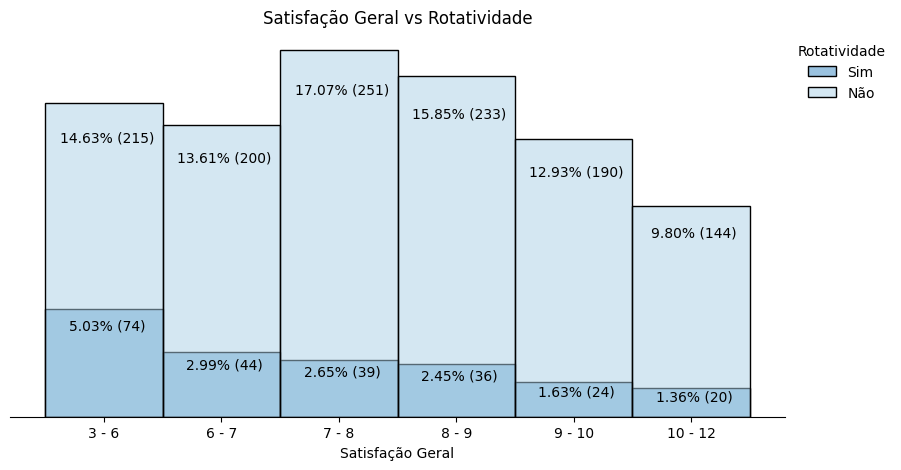

In [19]:
# Satisfação Geral vs Rotatividade
fig = plt.figure(figsize=(10,5))

df['Satisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']

create_histogram_to_attrition_view(
    data=df,
    x="Satisfaction",
    palette="Blues",
    title="Satisfação Geral vs Rotatividade",
    xlabel="Satisfação Geral",
    num=7
)


In [20]:
satisfaction_analysis(df)

NameError: name 'satisfaction_analysis' is not defined

• A satisfação com o ambiente em geral é uma questão a ser pontuada, pois interage diretamente com o cotidiano dos colaboradores, analisando os dados acima, demonstra que dos 13% de colaboradores, a satisfação tem 25% de influência na hora de tomar a decisão de sair da empresa.

#### **2.2 Performance**

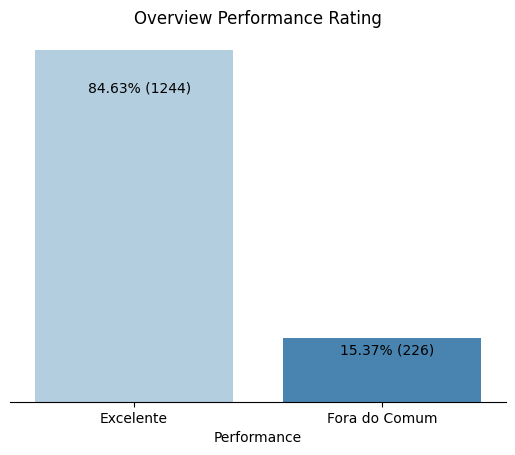

In [ ]:
total = df.PerformanceRating.count()

ax = sns.countplot(data=df, x="PerformanceRating", palette="Blues")


add_percent_and_total_value_annotations(ax, total)
plt.ylabel("")
plt.yticks([])
plt.xlabel("Performance")
plt.xticks(ticks=[0, 1], labels=['Excelente', "Fora do Comum"])
ax.spines[['left', 'top', 'right']].set_visible(False)
plt.title("Overview Performance Rating")
plt.show()

##### **2.2.1 Idade vs Performance**

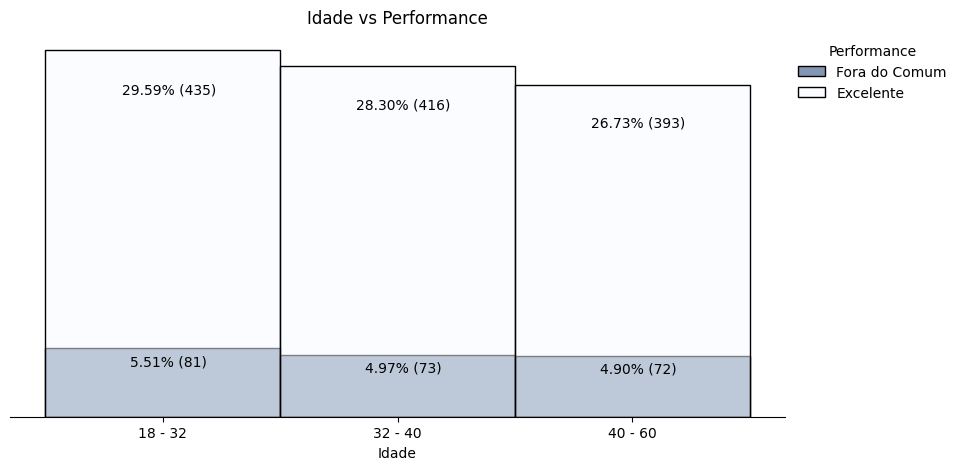

In [ ]:
fig = plt.figure(figsize=(10,5))
create_histogram_to_performance_view(data=df, x="Age", palette="Blues", title="Idade vs Performance", xlabel="Idade", num=4)

- **É evidente uma queda ao longo da idade remetendo à um esforço para ganhar espaço na empresa, já que é possível observar uma queda nos de performance "Excelente" e um estabilidade nos "Fora do Comum"**

##### **2.2.2 Renda Mensal vs Performance**

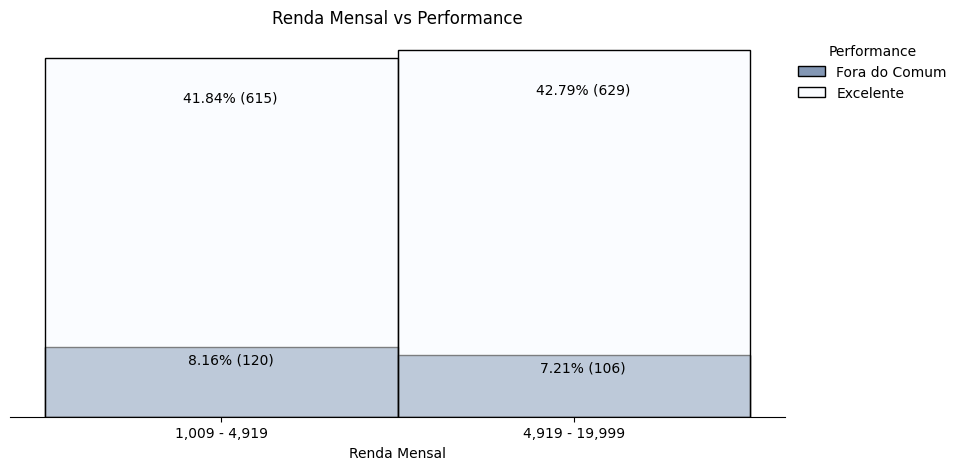

In [ ]:
fig = plt.figure(figsize=(10,5))
create_histogram_to_performance_view(data=df, x="MonthlyIncome", palette="Blues", title="Renda Mensal vs Performance", xlabel="Renda Mensal", num=3)

- **Mesma observação da idade, há um esforço para o reconhecimento dentro da empresa**

##### **2.2.3 Distância de Casa vs Performance**

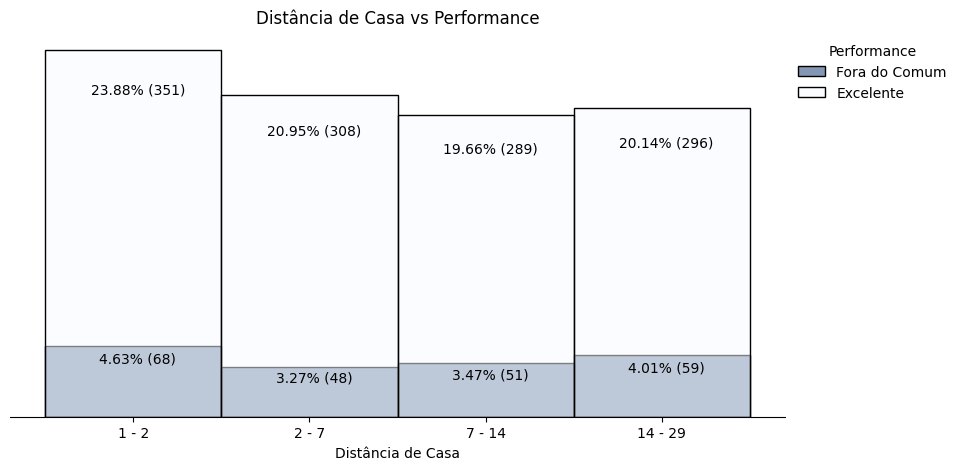

In [ ]:
fig = plt.figure(figsize=(10,5))
create_histogram_to_performance_view(data=df, x="DistanceFromHome", palette="Blues", title="Distância de Casa vs Performance", xlabel="Distância de Casa", num=5)

- **É justificável ter mais pessoas com performance "fora do comum" próximos da empresa, devido ao menor desgaste no deslocamento para a empresa.**
- **Averiguar a logística de transporte dos funcionários, até mesmo ver a possibilidade de incluir o deslocamento nas horas de trabalho**

##### **2.2.4 Anos na Empresa vs Performance**

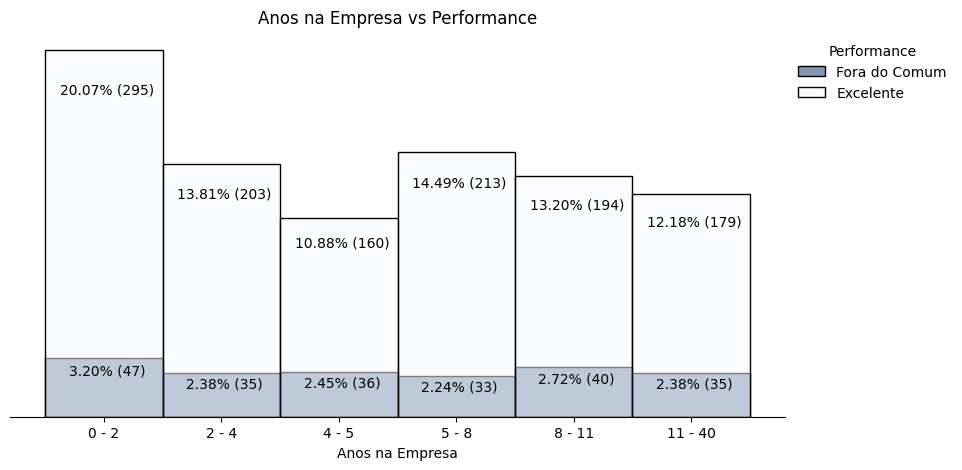

In [ ]:
fig = plt.figure(figsize=(10,5))
create_histogram_to_performance_view(data=df, x="YearsAtCompany", palette="Blues", title="Anos na Empresa vs Performance", xlabel="Anos na Empresa", num=7)

- **Ao iniciar numa empresa nova, um novo mundo, naturalmente a tendência é dar o melhor de si, por isso 3.2% das pessoas com até 2 anos na empresa tem esse desempenho esperado para uma possível promoção.**
- **Ademais, há uma linearidade com o passar dos anos, uma estabilidade, visto o esforço inicial.**

##### **2.2.5 Satisfação vs Performance**

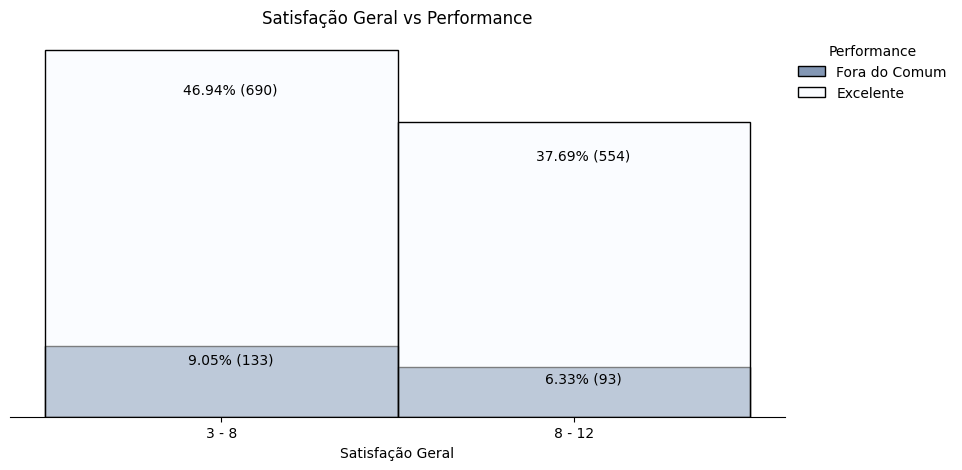

In [ ]:
fig = plt.figure(figsize=(10,5))
create_histogram_to_performance_view(data=df, x="Satisfaction", palette="Blues", title="Satisfação Geral vs Performance", xlabel="Satisfação Geral", num=3)

- **Os percentuais de uma satifação baixa-mediano indica que o ambiente geral de trabalho não está compatível com a performance do funcionário.**
- **É bom rever a cultura, assim como o cotidiano dos funcionários**

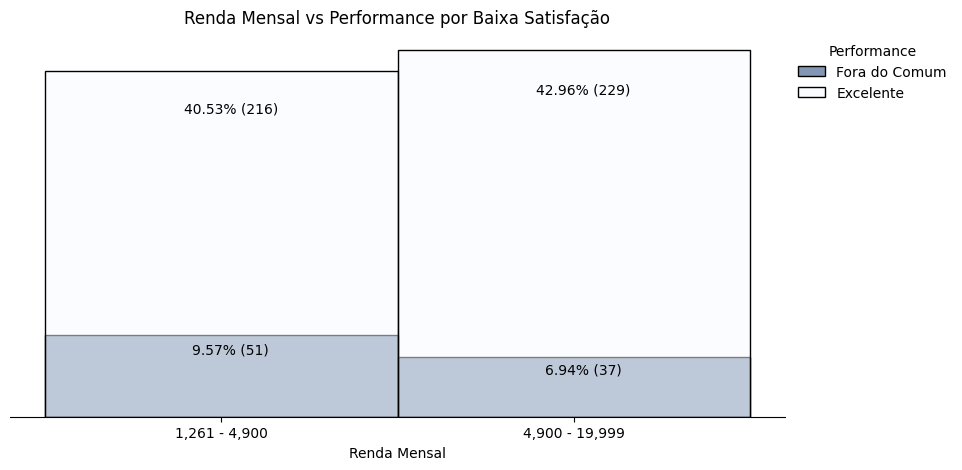

In [ ]:
satisfaction_3_7 = df[(df['Satisfaction'] >= 3) & (df['Satisfaction'] <= 7)]
fig = plt.figure(figsize=(10,5))
create_histogram_to_performance_view(data=satisfaction_3_7, x="MonthlyIncome", palette="Blues", title="Renda Mensal vs Performance por Baixa Satisfação", xlabel="Renda Mensal", num=3)

In [ ]:
print(f"Média salarial do grupo: ${satisfaction_3_7.MonthlyIncome.mean():.2f}")

Média salarial do grupo: $6516.40


- **Analisando os dados de baixa satisfação, é possível identificar um grupo que busca reconhecimento e promoção, devido à um bom percentual que tem uma performance fora do comum, mesmo com salário abaixo da média**

#### **2.3 Outras Análises**

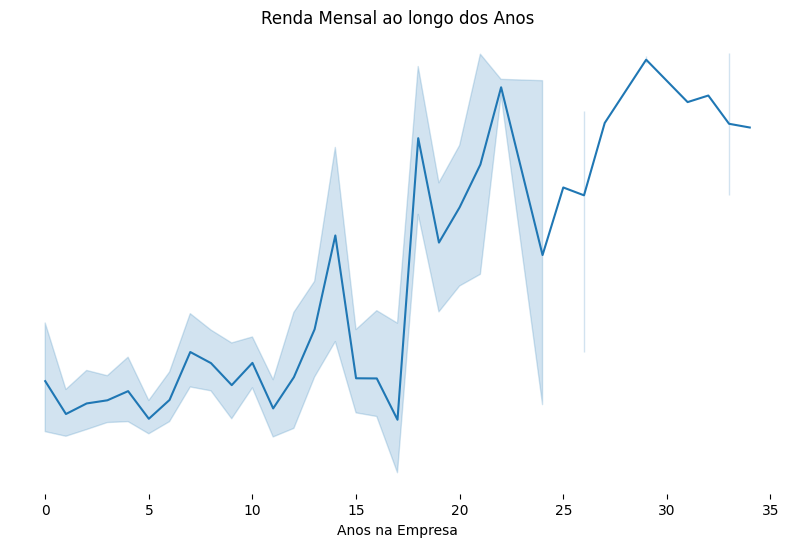

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="YearsAtCompany", y="MonthlyIncome", data=satisfaction_3_7)
ax.spines[['left', 'top', 'right', 'bottom']].set_visible(False)
plt.yticks([])
plt.ylabel("")
plt.xlabel("Anos na Empresa")
plt.title("Renda Mensal ao longo dos Anos")
plt.show()

### **Conclusão**

- **Rever o plano de carreira para os novos funcionários**
- **Rever a compatibilidade do salário com os anos na empresa**
- **Tratar da mobilidade do funcionário até a empresa**
- **Adicionar incentivos financeiros iniciais para reter bons profissionais**
- **Fazer uma análise detalhada do cotidiano dos funcionários no ambiente geral de trabalho**